 ## Support Vector Machines (SVM)
 Understanding Vectors

Decision Boundary 

What are support vectors & Hyperplace 

What is Support Vector Machine? 

Working of SVM 

Kernels and Types of Kernel 

Hard Margin & Soft Margin 

SVM for multi-class Classification 

[SVM](<../ml2/15 & 16 June-20241006T131223Z-001/01 & 02nd June/ML-15 SVM complete.pdf>)

https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/ 

https://www.kaggle.com/code/prashant111/svm-classifier-tutorial

https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/  --->maths


### Support Vector Machines (SVM)

#### Understanding Vectors

In the context of machine learning, vectors are mathematical objects that have both a magnitude and a direction. In a multi-dimensional space, vectors represent data points. For example, in a 2D space, each point can be represented as a vector \((x, y)\).

#### Decision Boundary

The **decision boundary** is a line (in 2D), plane (in 3D), or hyperplane (in higher dimensions) that separates different classes in the feature space. The goal of a classifier, including SVM, is to find the optimal decision boundary that maximizes the margin between the classes.

#### What are Support Vectors & Hyperplane

- **Support Vectors**: These are the data points that are closest to the decision boundary. They are critical because they define the position and orientation of the hyperplane. If you remove any other data points (not support vectors), the decision boundary remains unchanged.
  
- **Hyperplane**: A hyperplane is a flat affine subspace of one dimension less than its ambient space. For example:
  - In 2D, it is a line.
  - In 3D, it is a plane.
  - In n-dimensional space, it is an n-1 dimensional hyperplane.

The hyperplane is defined by the equation:
\[ w \cdot x + b = 0 \]
where \( w \) is the weight vector, \( x \) is the feature vector, and \( b \) is the bias term.

#### What is Support Vector Machine?

A **Support Vector Machine (SVM)** is a supervised machine learning algorithm used for classification and regression tasks. It aims to find the hyperplane that best separates data points of different classes while maximizing the margin between them. 

#### Working of SVM

1. **Data Representation**: Data points are represented as vectors in a high-dimensional space.
2. **Finding the Optimal Hyperplane**: SVM searches for the hyperplane that maximizes the margin between the closest data points of each class (the support vectors).
3. **Optimization Problem**: The optimization problem can be expressed as:
   - Maximize the margin: \( \frac{2}{\|w\|} \)
   - Subject to the constraints: \( y_i (w \cdot x_i + b) \geq 1 \)
   - Where \( y_i \) is the class label (+1 or -1), \( x_i \) are the training samples.

#### Kernels and Types of Kernel

SVM can be extended to non-linear classification using **kernels**. A kernel function transforms the input data into a higher-dimensional space where a linear hyperplane can be used for separation. Common types of kernels include:

1. **Linear Kernel**: Suitable for linearly separable data.
   \[ K(x_i, x_j) = x_i \cdot x_j \]

2. **Polynomial Kernel**: Captures interactions between features.
   \[ K(x_i, x_j) = (x_i \cdot x_j + c)^d \]
   where \( c \) is a constant and \( d \) is the degree.

3. **Radial Basis Function (RBF) Kernel**: Effective in many cases, especially with non-linear data.
   \[ K(x_i, x_j) = e^{-\gamma \|x_i - x_j\|^2} \]
   where \( \gamma \) is a parameter that defines the spread of the kernel.

4. **Sigmoid Kernel**: Similar to a neural network activation function.
   \[ K(x_i, x_j) = \tanh(\alpha (x_i \cdot x_j) + c) \]

#### Hard Margin & Soft Margin

- **Hard Margin SVM**: Assumes that the data is perfectly linearly separable. It tries to find a hyperplane with the maximum margin without any misclassified points. This can lead to overfitting when the data has noise or is not perfectly separable.

- **Soft Margin SVM**: Allows for some misclassifications in order to achieve a better generalization. It introduces a penalty for misclassifications, controlled by the parameter \( C \):
  - A larger \( C \) places more emphasis on correctly classifying all training samples.
  - A smaller \( C \) allows some misclassifications in favor of a larger margin.

#### SVM for Multi-Class Classification

SVM is inherently a binary classifier, but it can be extended to multi-class classification using strategies like:

1. **One-vs-One (OvO)**: Trains a binary classifier for every pair of classes. For \( k \) classes, this results in \( \frac{k(k-1)}{2} \) classifiers.
  
2. **One-vs-Rest (OvR)**: Trains a single binary classifier for each class, distinguishing that class from all others. For \( k \) classes, this results in \( k \) classifiers.

### Conclusion

Support Vector Machines are powerful tools for both linear and non-linear classification tasks. Understanding the concepts of support vectors, hyperplanes, kernels, and margin types is crucial for effectively applying SVM in real-world problems.


SVM Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        63
           1       0.90      0.95      0.93       108

    accuracy                           0.91       171
   macro avg       0.91      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



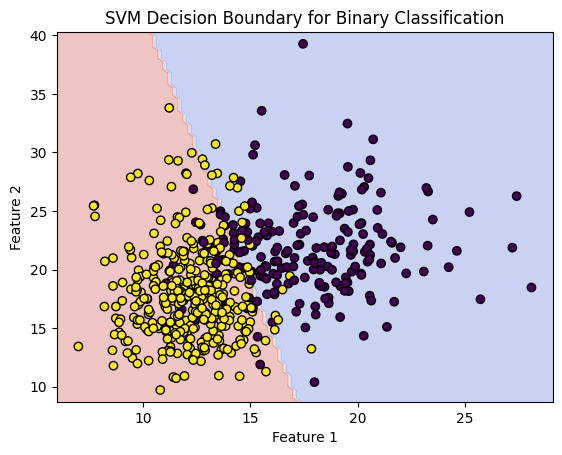

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data[:, :2]  # Use only the first two features for training and visualization
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Support Vector Classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plotting the decision boundary
def plot_decision_boundary(model, X, y):
    # Create a grid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict the class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("SVM Decision Boundary for Binary Classification")
    plt.show()

# Call the function to plot the decision boundary
plot_decision_boundary(svm_classifier, X, y)  # Now this uses the same two features used for training


### CrossValidations

In [3]:
from sklearn.model_selection import GridSearchCV
params = {'C': [1, 2, 3, 4, 5, 10, 20, 50, 100],
         'gamma': [0.2, 1, 0.4, 0.001, 0.003],
         'kernel': ['linear']}

params


{'C': [1, 2, 3, 4, 5, 10, 20, 50, 100],
 'gamma': [0.2, 1, 0.4, 0.001, 0.003],
 'kernel': ['linear']}

In [5]:
grid = GridSearchCV(svm_classifier, param_grid=params, cv=5, verbose=3)

In [6]:
grid

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42),
             param_grid={'C': [1, 2, 3, 4, 5, 10, 20, 50, 100],
                         'gamma': [0.2, 1, 0.4, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [7]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.875 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.900 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.938 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.823 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.861 total time=   0.0s
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.875 total time=   0.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.938 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.823 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.861 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.4, kernel=linear;, score=0.875 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.4, kernel=linear

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42),
             param_grid={'C': [1, 2, 3, 4, 5, 10, 20, 50, 100],
                         'gamma': [0.2, 1, 0.4, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [8]:
grid.best_params_

{'C': 1, 'gamma': 0.2, 'kernel': 'linear'}

In [9]:
grid.best_score_

np.float64(0.8792088607594936)

To implement Support Vector Machines (SVM) for multi-class classification, we can use the Iris dataset, which contains three classes of iris flowers. Here’s how to set up the model using `scikit-learn` and evaluate its performance.

### SVM for Multi-Class Classification Example

SVM Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



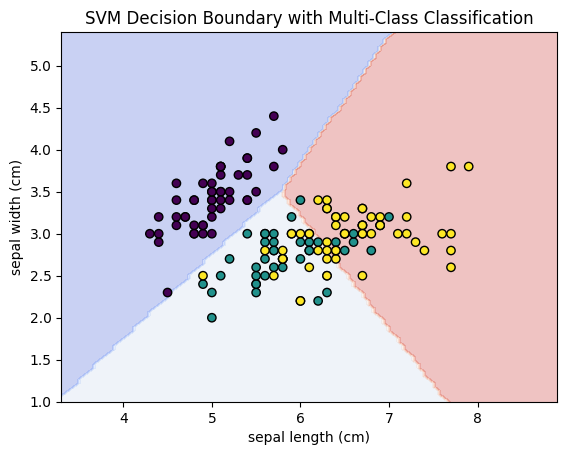

In [10]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Support Vector Classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the decision boundary
def plot_decision_boundary(model, X, y):
    # Create a grid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict the class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title("SVM Decision Boundary with Multi-Class Classification")
    plt.show()

# Call the function to plot the decision boundary
plot_decision_boundary(svm_classifier, X, y)


### Explanation of the Code

1. **Import Libraries**: Necessary libraries are imported for data manipulation, model training, and visualization.

2. **Load the Dataset**: The Iris dataset is loaded, and only the first two features are selected for easy visualization.

3. **Split the Data**: The dataset is split into training (70%) and testing (30%) sets using `train_test_split`.

4. **Create the SVM Classifier**: An SVM classifier is created using a linear kernel, which is suitable for multi-class classification.

5. **Train the Model**: The model is trained on the training data.

6. **Make Predictions**: The model makes predictions on the test set.

7. **Evaluate Performance**: The accuracy and a classification report (including precision, recall, and F1 score) are printed for all classes.

8. **Plot Decision Boundary**: A function is defined to visualize the decision boundary created by the SVM model. It creates a mesh grid of points, predicts the class for each point, and plots the results along with the actual data points.

### Conclusion

This example illustrates how to implement SVM for multi-class classification using `scikit-learn`. You can experiment with different kernels, such as the RBF kernel, and adjust hyperparameters to see how they affect model performance. This approach is applicable to many datasets beyond the Iris dataset!

============================
# Support Vector Regression (SVR)
Here’s how to implement Support Vector Regression (SVR) using the `scikit-learn` library in Python. This example will demonstrate using SVR to predict values from a simple synthetic dataset.


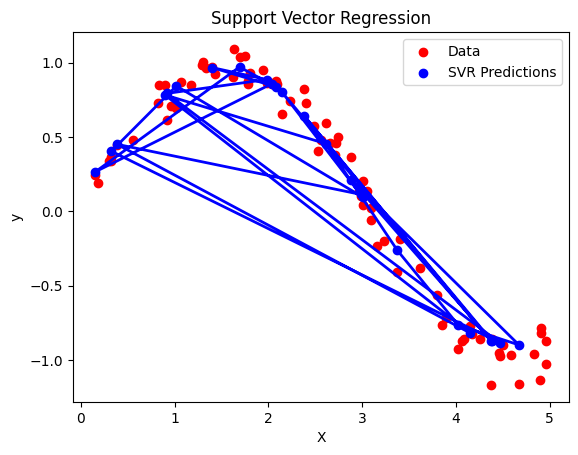

In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Create a synthetic dataset
X = np.sort(5 * np.random.rand(80, 1), axis=0)  # 80 random points between 0 and 5
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Sinusoidal data with noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Support Vector Regressor with a linear kernel
svr_regressor = SVR(kernel='rbf', C=100, gamma='scale')  # RBF kernel

# Train the model
svr_regressor.fit(X_train, y_train)

# Make predictions
y_pred = svr_regressor.predict(X_test)
 
# Plotting the results
plt.scatter(X, y, color='red', label='Data')
plt.scatter(X_test, y_pred, color='blue', label='SVR Predictions')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.title('Support Vector Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


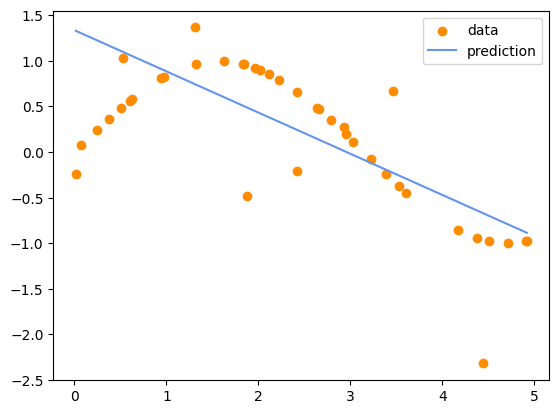

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.svm import SVR 

# generate synthetic data 
X = np.sort(5 * np.random.rand(40, 1), 
			axis=0) 
y = np.sin(X).ravel() 

# add some noise to the data 
y[::5] += 3 * (0.5 - np.random.rand(8)) 

# create an SVR model with a linear kernel 
svr = SVR(kernel='linear')  
svr.fit(X, y) 
y_pred = svr.predict(X) 

# plotting the predicted vs true values
plt.scatter(X, y, color='darkorange', 
			label='data') 
plt.plot(X, y_pred, color='cornflowerblue', 
		label='prediction') 
plt.legend() 
plt.show() 


#### Fitting SVR on Sine Curve Data Using RBF Kernels

Subsequently, we'll employ a Support Vector Regression (SVR) model utilizing an RBF (Radial Basis Function) kernel. This strategy is expected to yield the most optimal results, as the RBF kernel is renowned for effectively introducing non-linearity into our model, potentially enhancing its performance significantly.

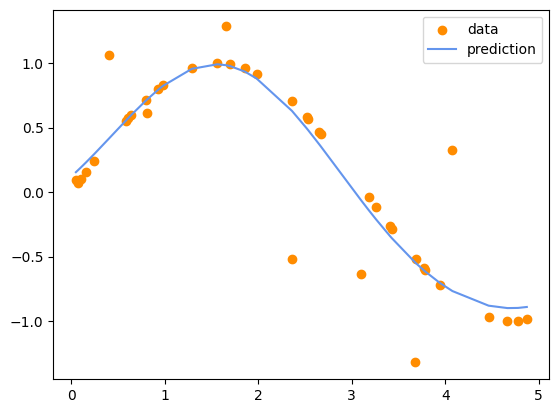

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.svm import SVR 

# generate synthetic data 
X = np.sort(5 * np.random.rand(40, 1), 
			axis=0) 
y = np.sin(X).ravel() 

# add some noise to the data 
y[::5] += 3 * (0.5 - np.random.rand(8)) 

# create an SVR model with a rbf kernel 
svr = SVR(kernel='rbf') 
svr.fit(X, y) 
y_pred = svr.predict(X) 

# plot the predicted values against the true values 
plt.scatter(X, y, color='darkorange', 
			label='data') 
plt.plot(X, y_pred, color='cornflowerblue', 
		label='prediction') 
plt.legend() 
plt.show() 


https://towardsdatascience.com/machine-learning-basics-support-vector-regression-660306ac5226

https://www.scaler.com/topics/support-vector-regression/


### Explanation of the Code

1. **Import Libraries**: We import necessary libraries for data manipulation, model training, and visualization.

2. **Create Synthetic Dataset**: A synthetic dataset is created using a sine function with some added noise. This simulates a regression problem.

3. **Split the Data**: The dataset is split into training (70%) and testing (30%) sets using `train_test_split`.

4. **Create the SVR Model**: An SVR model is instantiated with a radial basis function (RBF) kernel. You can also experiment with linear or polynomial kernels.

5. **Train the Model**: The model is trained on the training data.

6. **Make Predictions**: Predictions are made on the test set.

7. **Plotting the Results**: The actual data points and the predictions made by the SVR model are plotted for visualization.

### Conclusion

This example demonstrates how to implement Support Vector Regression using `scikit-learn`. You can experiment with different kernels, hyperparameters (like `C` and `gamma`), and datasets to better understand how SVR works and its applications in regression tasks!

### SVM Kernels

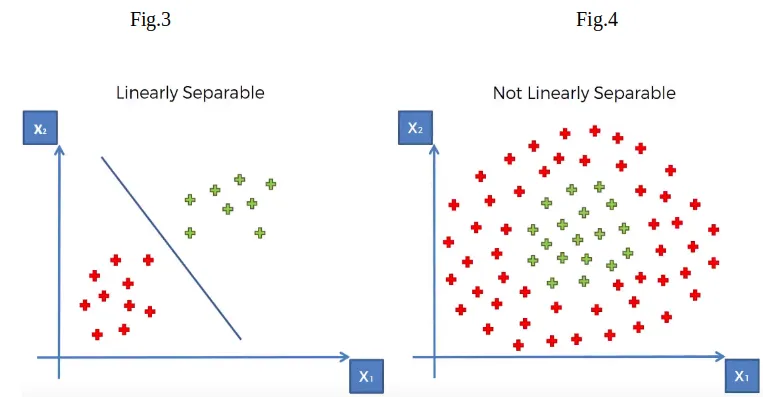
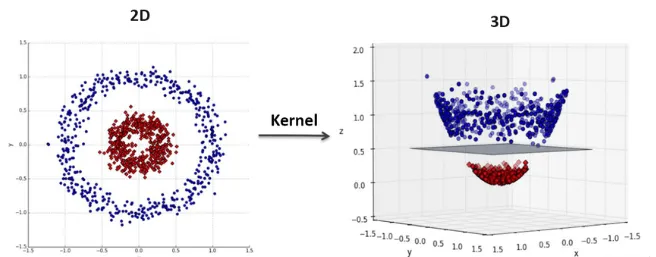

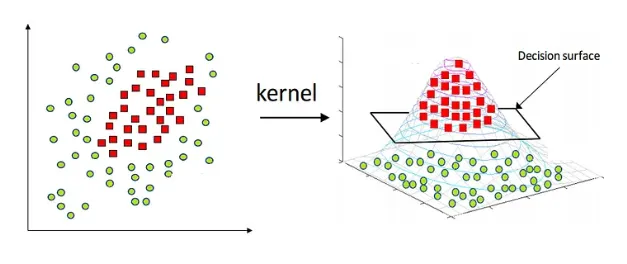

https://medium.com/@abhishekjainindore24/svm-kernels-and-its-type-dfc3d5f2dcd8

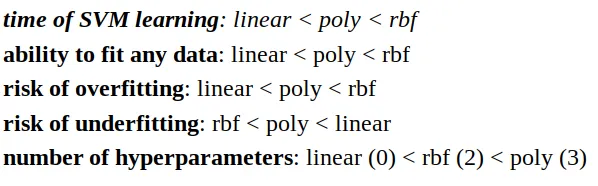

https://ankitnitjsr13.medium.com/math-behind-support-vector-machine-svm-5e7376d0ee4d

https://ankitnitjsr13.medium.com/math-behind-svm-kernel-trick-5a82aa04ab04

### Real-World Applications SVM Kernels
SVM kernels are used in many real-world areas. In finance, simple linear kernels help with credit scoring and fraud detection because they're easy to understand and fast. In biology, more complex non-linear kernels like RBF help predict protein structures and analyze gene data. For images, polynomial kernels are used to figure out what objects are in pictures by looking at their details. In text tasks like figuring out if a message is positive or negative, SVMs with different kernels handle the job. Also, in healthcare, different types of Kernel in SVM help diagnose diseases and predict outcomes by finding patterns in medical data.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [15]:
x = np.linspace(-6, 6, 100)
y = np.sqrt(10**2-x**2)
y = np.hstack([y, -y])
x = np.hstack([x, -x])

In [16]:
x1 = np.linspace(-6, 6, 100)
y1 = np.sqrt(4**2-x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

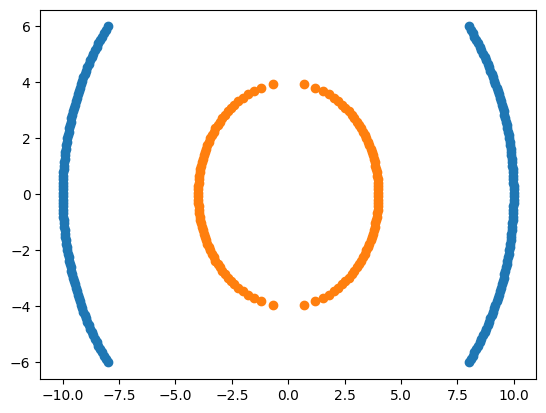

In [17]:
plt.scatter(y,x)
plt.scatter(y1, x1)

In [18]:
df1 = pd.DataFrame(np.vstack([y, x]).T, columns=['X1', 'X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns=['X1', 'X2'])
df2['Y'] = 1
df = pd.concat([df1, df2], ignore_index=True)
df

,X1,X2,Y
0,8.000000,-6.000000,0
1,8.089490,-5.878788,0
2,8.176205,-5.757576,0
3,8.260230,-5.636364,0
4,8.341649,-5.515152,0
...,...,...,...
395,NaN,-5.515152,1
396,NaN,-5.636364,1
397,NaN,-5.757576,1
398,NaN,-5.878788,1


In [19]:
df1 = df.copy()
df1

,X1,X2,Y
0,8.000000,-6.000000,0
1,8.089490,-5.878788,0
2,8.176205,-5.757576,0
3,8.260230,-5.636364,0
4,8.341649,-5.515152,0
...,...,...,...
395,NaN,-5.515152,1
396,NaN,-5.636364,1
397,NaN,-5.757576,1
398,NaN,-5.878788,1


In [20]:
df1["x1square"] = df1["X1"]**2
df1["x2square"] = df1["X2"]**2
df1["x1x2"] = df1["X1"]*df1["X2"]
df1.head()

,X1,X2,Y,x1square,x2square,x1x2
0,8.000000,-6.000000,0,64.000000,36.000000,-48.000000
1,8.089490,-5.878788,0,65.439853,34.560147,-47.556397
2,8.176205,-5.757576,0,66.850321,33.149679,-47.075117
3,8.260230,-5.636364,0,68.231405,31.768595,-46.557662
4,8.341649,-5.515152,0,69.583104,30.416896,-46.005457


In [21]:
df1 = df1.dropna()
X = df1[["x1square", "x2square", "x1x2"]]
y = df1['Y']

In [22]:
X
y

0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    1
382    1
Name: Y, Length: 332, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [28]:
# !pip install plotly
import plotly.express as px

In [29]:
px.scatter_3d(df1, x = "x1square", y = "x2square", z = "x1x2")

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
cls = SVC(kernel = "linear")
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [32]:
df = df.dropna()
df

,X1,X2,Y
0,8.000000,-6.000000,0
1,8.089490,-5.878788,0
2,8.176205,-5.757576,0
3,8.260230,-5.636364,0
4,8.341649,-5.515152,0
...,...,...,...
378,-2.016461,-3.454545,1
379,-1.792751,-3.575758,1
380,-1.527225,-3.696970,1
381,-1.192262,-3.818182,1


In [33]:
X=df[["X1", "X2"]]
y = df["Y"]
X

,X1,X2
0,8.000000,-6.000000
1,8.089490,-5.878788
2,8.176205,-5.757576
3,8.260230,-5.636364
4,8.341649,-5.515152
...,...,...
378,-2.016461,-3.454545
379,-1.792751,-3.575758
380,-1.527225,-3.696970
381,-1.192262,-3.818182


In [34]:
y

0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    1
382    1
Name: Y, Length: 332, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
cls = SVC(kernel = "rbf")
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
cls = SVC(kernel = "poly")
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

0.62

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
cls = SVC(kernel = "sigmoid")
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
accuracy_score(y_test, y_pred)

0.65

Defaulting to user installation because normal site-packages is not writeable
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.1 MB 3.4 MB/s eta 0:00:06
   ----- ---------------------------------- 2.6/19.1 MB 7.2 MB/s eta 0:00:03
   -------- ------------------------------- 4.2/19.1 MB 6.8 MB/s eta 0:00:03
   ------------ --------------------------- 5.8/19.1 MB 6.5 MB/s eta 0:00:03
   -------------- ------------------------- 7.1/19.1 MB 6.3 MB/s eta 0:00:02
   ------------------ --------------------- 8.7/19.1 MB 6.5 MB/s eta 0:00:02
   ---------------------- ----------------- 10.5/19.1 MB 6.7 MB/s eta 0:00:02
   -------------------------- ------------- 12.8/19.1 MB 6.9 MB/s eta 0:00:01
   ------------------------------ --------- 14.4/19.1 MB 7.0 MB/s eta 0:00:01
   ---------------------------------- ----- 16.5/19.1 MB 7.1 MB/s eta 0:00:01
   ----------

#### Questions

Q. Which kernel to use in SVR? 
Ans. In SVR, you pick the kernel based on how complicated the data is. Also, how the input and output variables relate. You can choose from common options like linear, polynomial, and RBF. As well as sigmoid, but you might need to try a few to see which one works best for your regression problem.

Q. Why are kernel functions used?
Ans. Kernel functions in SVMs help change data to make it easier for the model to understand. This lets the model find better boundaries between different groups of data and deal with complicated relationships between points. As well as helping it make accurate predictions in all sorts of data.

Q. What are the most popular SVM kernels?
Ans. The most common SVM kernels are linear, good for straight-line data, polynomial, and useful for curves. Radial basis function (RBF), is great for complex patterns. Also, sigmoid can handle different kinds of data changes.